In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from reynir import Greynir
import re

%matplotlib inline

In [29]:
imdb_google = pd.read_csv("../IMDB-Dataset-GoogleTranslate.csv")
imdb_google.head()

,review,sentiment
0,Hvattur af jákvæðum ummælum um þessa mynd hérn...,negative
1,Einn hinna gagnrýnenda hefur nefnt að eftir að...,positive
2,Yndisleg lítil framleiðsla. Kvikmyndatæknin er...,positive
3,"""Love in the Time of Money"" eftir Petter Matte...",positive
4,Í grundvallaratriðum er fjölskylda þar sem lít...,negative


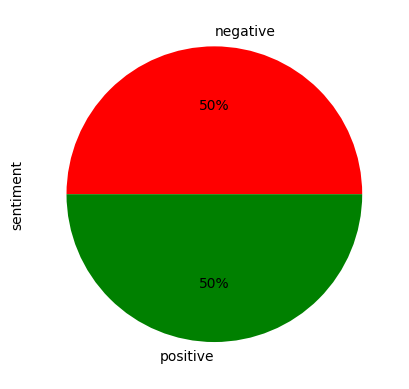

In [32]:
imdb_google.sentiment.value_counts().plot(
    kind="pie", autopct="%1.0f%%", colors=["red", "green"]
);

In [25]:
imdb_mideind = pd.read_csv("../IMDB-Dataset-MideindTranslate.csv")
imdb_mideind.head()

,review,sentiment
0,Einn af hinum rýnunum hefur nefnt að eftir að ...,positive
1,Dásamleg lítil framleiðsla. Kvikmyndatæknin er...,positive
2,Mér fannst þetta dásamleg leið til að eyða tím...,positive
3,Eiginlega er fjölskylda þar sem lítill strákur...,negative
4,„Ást á tímum peninga“ eftir Petter Mattei er s...,positive


<Axes: ylabel='sentiment'>

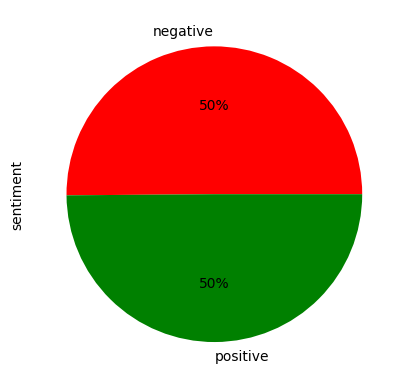

In [33]:
imdb_mideind.sentiment.value_counts().plot(
    kind="pie", autopct="%1.0f%%", colors=["red", "green"]
)

In [34]:
imdb_mideind.count()

review       48709
sentiment    48709
dtype: int64

In [7]:
def process_review(review):
    return review
    # with open(file_path, 'r') as f:
    #     words_to_remove = set(f.read().splitlines())

    # review = review.lower()
    # review = re.sub(r'\d+', '', review) # remove numbers from review text
    # review = re.sub(r'[^\w\s]', '', review) # remove punctuation from review text
    # review = review.strip() # remove leading and trailing spaces
    # review_words = []
    # for word in review.split():
    #     if word not in words_to_remove:
    #         review_words.append(word)

    # return ' '.join(review_words)

    # g = Greynir()
    # processed_review = ''
    # for word in review.split():
    #     if word not in words_to_remove:
    #         lemmas = g.parse_single(word).lemmas
    #         if lemmas:
    #             processed_review += lemmas[0] + ' '
    #         else:
    #             processed_review += word + ' '

    # return review

In [8]:
def build_freqs(reviews, sentiments):
    freqs = {}
    for review, sentiment in zip(reviews, sentiments):
        for word in process_review(review).split():
            pair = (word, sentiment)
            freqs[pair] = freqs.get(pair, 0) + 1
    return freqs

In [10]:
def extract_features(review, freqs):
    x = np.zeros((1, 3))
    x[0, 0] = 1
    for word in set(review.split()):
        x[0, 1] += freqs.get((word, 1), 0)
        x[0, 2] += freqs.get((word, 0), 0)
    return x

In [15]:
reviews = imdb_google["review"].values
sentiments = imdb_google["sentiment"].values
sentiments = np.where(sentiments == "positive", 1, 0)
file_path = "../all_stop_words.txt"

reviews
freqs = build_freqs(reviews, sentiments)

X = np.zeros((len(reviews), 3))

for i in range(len(reviews)):
    X[i, :] = extract_features(reviews[i], freqs)

X_train, X_test, y_train, y_test = train_test_split(
    X, sentiments, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.724


In [53]:
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

[[3471 1507]
 [1466 3556]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      4978
           1       0.70      0.71      0.71      5022

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [54]:
reviews = imdb_mideind["review"].values
sentiments = imdb_mideind["sentiment"].values
sentiments = np.where(sentiments == "positive", 1, 0)
file_path = "../all_stop_words.txt"

reviews
freqs = build_freqs(reviews, sentiments)

X = np.zeros((len(reviews), 3))

for i in range(len(reviews)):
    X[i, :] = extract_features(reviews[i], freqs)

X_train, X_test, y_train, y_test = train_test_split(
    X, sentiments, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.6832272633956067


In [55]:
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print(classification_report(y_test, y_pred))

[[3001 1819]
 [1267 3655]]
              precision    recall  f1-score   support

           0       0.70      0.62      0.66      4820
           1       0.67      0.74      0.70      4922

    accuracy                           0.68      9742
   macro avg       0.69      0.68      0.68      9742
weighted avg       0.69      0.68      0.68      9742



In [2]:
from process import TextNormalizer

tn = TextNormalizer()


def process_review(review):
    return tn.process(review)

d:\HR\LOKA\sentiment-analysis\src
['sannur segja finna mynd ekki vera mjög skemmtilegur', 'mér finna mynd geggjaður', 'mér finna mynd mjög skemmtilegur', 'ég vera skellihlæjandi tíma mynd vera fyndinn']


In [60]:
reviews = imdb_google["review"].values
sentiments = imdb_google["sentiment"].values
sentiments = np.where(sentiments == "positive", 1, 0)
file_path = "../all_stop_words.txt"

reviews
freqs = build_freqs(reviews, sentiments)

X = np.zeros((len(reviews), 3))

for i in range(len(reviews)):
    X[i, :] = extract_features(reviews[i], freqs)

X_train, X_test, y_train, y_test = train_test_split(
    X, sentiments, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.6947


In [61]:
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

[[3684 1294]
 [1759 3263]]
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      4978
           1       0.72      0.65      0.68      5022

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [ ]:
reviews = imdb_mideind["review"].values
sentiments = imdb_mideind["sentiment"].values
sentiments = np.where(sentiments == "positive", 1, 0)
file_path = "../all_stop_words.txt"

reviews
freqs = build_freqs(reviews, sentiments)

X = np.zeros((len(reviews), 3))

for i in range(len(reviews)):
    X[i, :] = extract_features(reviews[i], freqs)

X_train, X_test, y_train, y_test = train_test_split(
    X, sentiments, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.6832272633956067


In [ ]:
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print(classification_report(y_test, y_pred))

[[3001 1819]
 [1267 3655]]
              precision    recall  f1-score   support

           0       0.70      0.62      0.66      4820
           1       0.67      0.74      0.70      4922

    accuracy                           0.68      9742
   macro avg       0.69      0.68      0.68      9742
weighted avg       0.69      0.68      0.68      9742



In [4]:
imdb_google = pd.read_csv("../IMDB-Dataset-GoogleTranslate-Processed.csv")
imdb_google.head()

,Unnamed: 0,review,sentiment
0,0,hvattur jákvæðum ummælum mynd hérna hlakka hor...,negative
1,1,einn gagnrýnenda hafa nefndur hafa horft aðein...,positive
2,2,yndislegur lítill framleiðsla kvikmyndatækni m...,positive
3,3,love in the time money petter mattei sjónrænn ...,positive
4,4,í grundvallaratriðum fjölskylda lítill strákur...,negative


In [11]:
reviews = imdb_google["review"].values
sentiments = imdb_google["sentiment"].values
sentiments = np.where(sentiments == "positive", 1, 0)
file_path = "../all_stop_words.txt"

reviews
freqs = build_freqs(reviews, sentiments)

X = np.zeros((len(reviews), 3))

for i in range(len(reviews)):
    X[i, :] = extract_features(reviews[i], freqs)

X_train, X_test, y_train, y_test = train_test_split(
    X, sentiments, test_size=0.2, random_state=42
)

model = LogisticRegression(
    C=30,
    class_weight="balanced",
    solver="newton-cg",
    multi_class="multinomial",
    n_jobs=-1,
    random_state=40,
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.7706


In [28]:
# sort freqs by value
sorted_freqs = sorted(freqs.items(), key=lambda x: x[1], reverse=True)
sorted_freqs

[(('vera', 0), 108383),
 (('vera', 1), 88395),
 (('ekki', 0), 76303),
 (('ekki', 1), 57992),
 (('mynd', 0), 54447),
 (('hafa', 0), 54108),
 (('hafa', 1), 50357),
 (('mynd', 1), 50184),
 (('ég', 0), 36814),
 (('það', 0), 35604),
 (('ég', 1), 33176),
 (('það', 1), 30781),
 (('eru', 0), 27293),
 (('eru', 1), 26759),
 (('gera', 0), 25421),
 (('gera', 1), 21906),
 (('þessi', 1), 21692),
 (('þessi', 0), 21419),
 (('bara', 0), 19844),
 (('mjög', 1), 19189),
 (('mikill', 0), 18828),
 (('mikill', 1), 17835),
 (('koma', 1), 17257),
 (('koma', 0), 15926),
 (('góður', 0), 15661),
 (('góður', 1), 15599),
 (('horfa', 0), 14137),
 (('sjá', 1), 14044),
 (('verða', 1), 13978),
 (('mjög', 0), 13687),
 (('segja', 0), 13498),
 (('fara', 0), 13461),
 (('verða', 0), 13324),
 (('eiga', 0), 13008),
 (('kvikmynd', 0), 12828),
 (('frábær', 1), 12535),
 (('fara', 1), 12351),
 (('eiga', 1), 12205),
 (('geta', 0), 12172),
 (('sjá', 0), 12092),
 (('bara', 1), 11979),
 (('kvikmynd', 1), 11878),
 (('the', 1), 11729),

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
reviews = imdb_google["review"].values
sentiments = imdb_google["sentiment"].values
sentiments = np.where(sentiments == "positive", 1, 0)
file_path = "../all_stop_words.txt"

# reviews
# freqs = build_freqs(reviews, sentiments)

# X = np.zeros((len(reviews), 3))

# for i in range(len(reviews)):
#     X[i, :] = extract_features(reviews[i], freqs)

X_train, X_test, y_train, y_test = train_test_split(
    reviews, sentiments, test_size=0.2, random_state=42
)

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

model = LogisticRegression(
    C=30,
    class_weight="balanced",
    solver="newton-cg",
    multi_class="multinomial",
    n_jobs=-1,
    random_state=40,
)
model.fit(X_train_counts, y_train)
y_pred = model.predict(X_test_counts)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.8734


In [58]:
model = LogisticRegression(max_iter=1000, n_jobs=-1, random_state=40)
model.fit(X_train_counts, y_train)
y_pred = model.predict(X_test_counts)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.8841


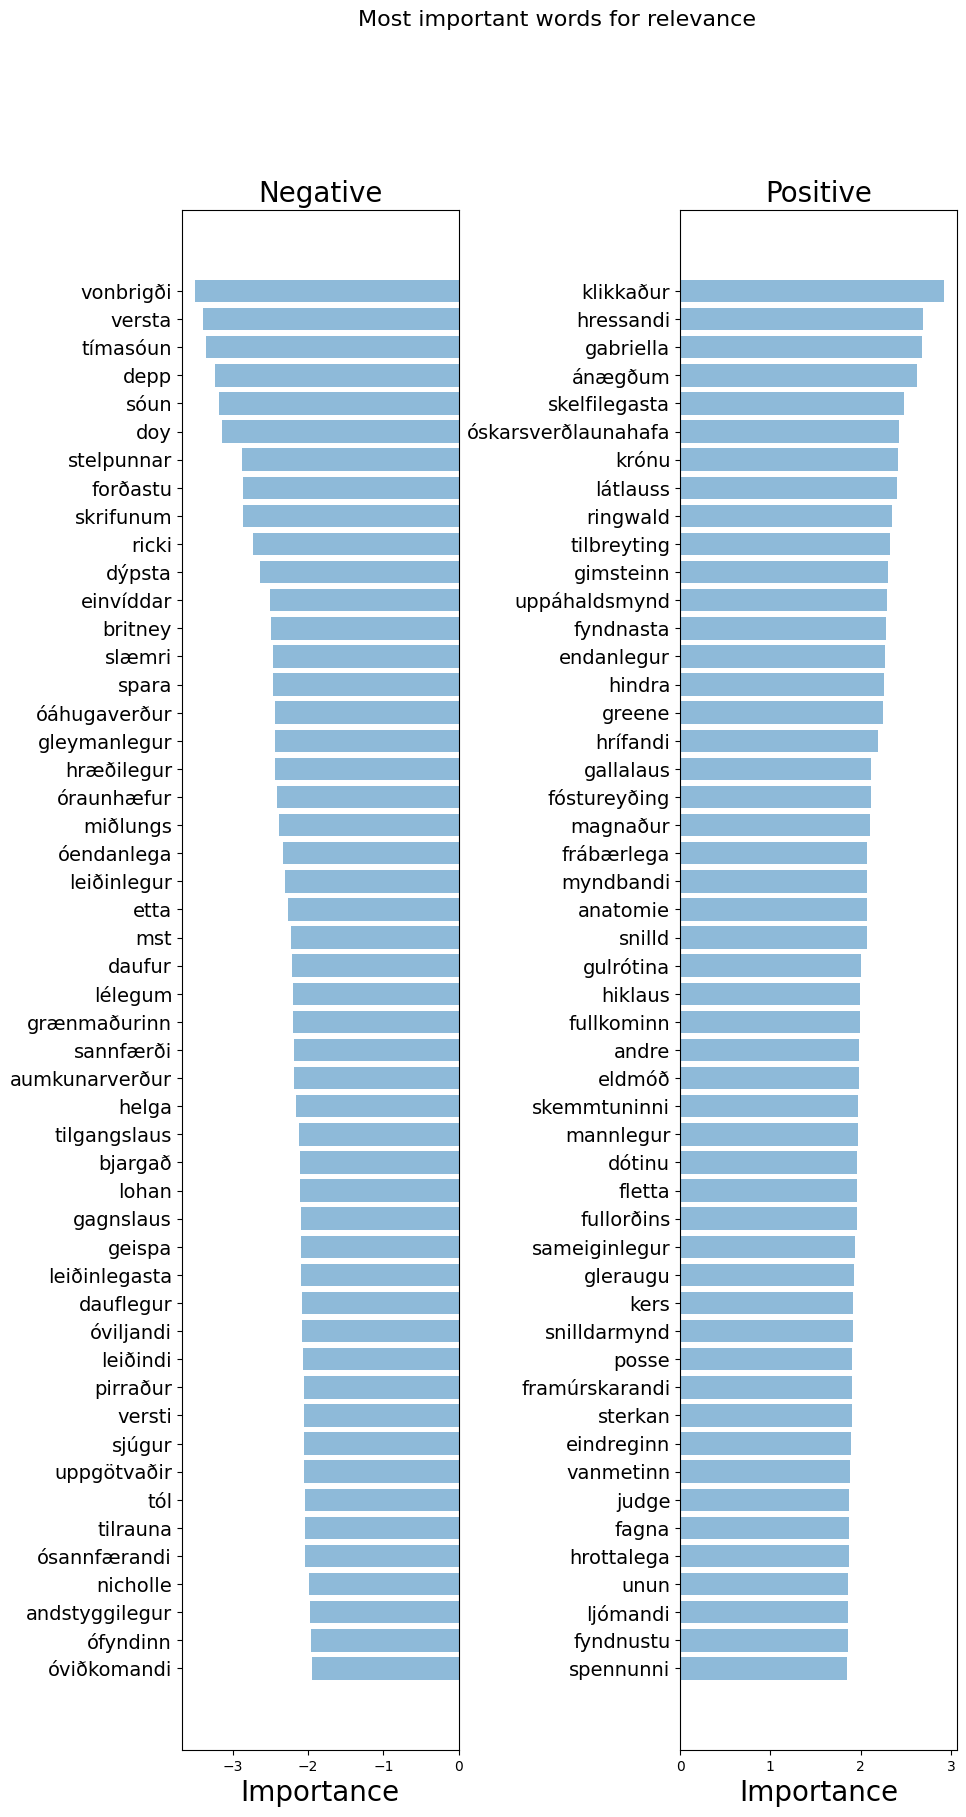

In [51]:
import numpy as np
import matplotlib.pyplot as plt


def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v: k for k, v in vectorizer.vocabulary_.items()}

    # loop for each class
    classes = {}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [
            (el, index_to_word[i]) for i, el in enumerate(model.coef_[class_index])
        ]
        sorted_coeff = sorted(word_importances, key=lambda x: x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key=lambda x: x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {"tops": tops, "bottom": bottom}
    return classes


def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a, b) for a, b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])

    bottom_pairs = [(a, b) for a, b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)

    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]

    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]

    fig = plt.figure(figsize=(10, 20))

    plt.subplot(121)
    plt.barh(y_pos, bottom_scores, align="center", alpha=0.5)
    plt.title("Negative", fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle("Key words", fontsize=16)
    plt.xlabel("Importance", fontsize=20)

    plt.subplot(122)
    plt.barh(y_pos, top_scores, align="center", alpha=0.5)
    plt.title("Positive", fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel("Importance", fontsize=20)

    plt.subplots_adjust(wspace=0.8)
    plt.show()


importance = get_most_important_features(vectorizer, model, 50)

top_scores = [a[0] for a in importance[0]["tops"]]
top_words = [a[1] for a in importance[0]["tops"]]
bottom_scores = [a[0] for a in importance[0]["bottom"]]
bottom_words = [a[1] for a in importance[0]["bottom"]]

plot_important_words(
    top_scores,
    top_words,
    bottom_scores,
    bottom_words,
    "Most important words for relevance",
)

In [67]:
reviews = imdb_google["review"].values
sentiments = imdb_google["sentiment"].values
sentiments = np.where(sentiments == "positive", 1, 0)
file_path = "../all_stop_words.txt"

# reviews
# freqs = build_freqs(reviews, sentiments)

# X = np.zeros((len(reviews), 3))

# for i in range(len(reviews)):
#     X[i, :] = extract_features(reviews[i], freqs)

X_train, X_test, y_train, y_test = train_test_split(
    reviews, sentiments, test_size=0.2, random_state=42
)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

model = LogisticRegression(
    C=10.0, class_weight="balanced", solver="liblinear", multi_class="ovr"
)
model.fit(X_train_counts, y_train)
y_pred = model.predict(X_test_counts)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.8971


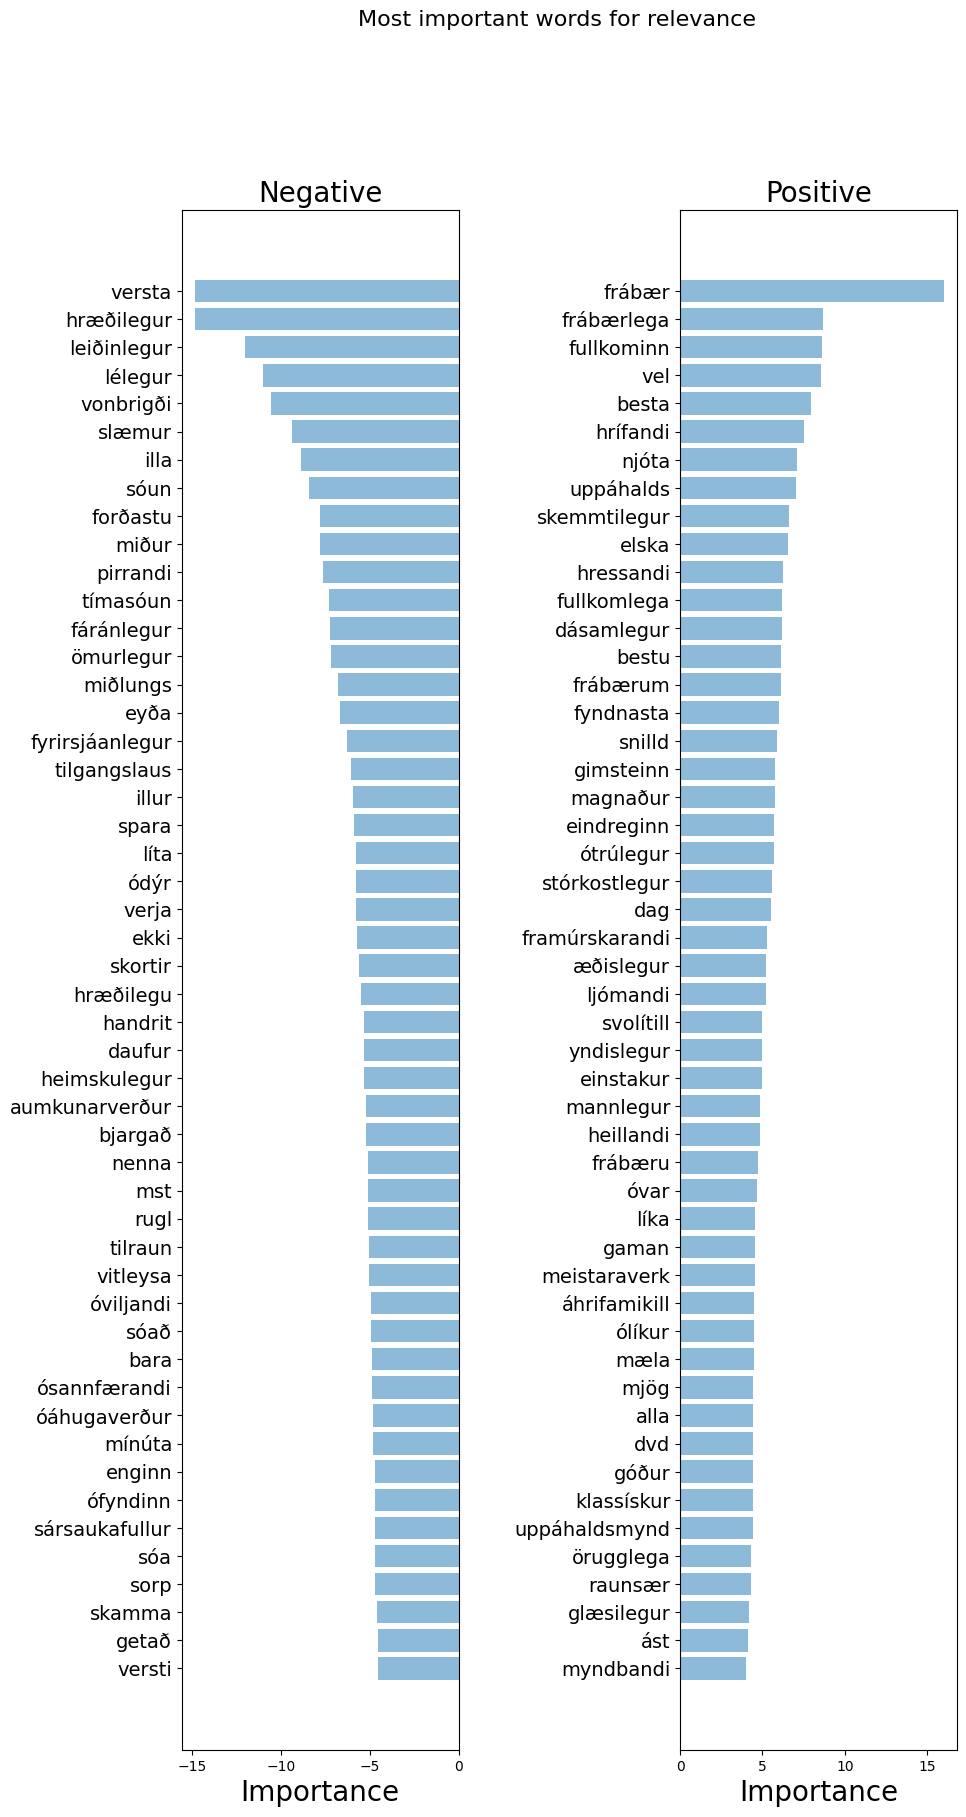

In [68]:
importance_tfidf = get_most_important_features(vectorizer, model, 50)
top_scores = [a[0] for a in importance_tfidf[0]["tops"]]
top_words = [a[1] for a in importance_tfidf[0]["tops"]]
bottom_scores = [a[0] for a in importance_tfidf[0]["bottom"]]
bottom_words = [a[1] for a in importance_tfidf[0]["bottom"]]

plot_important_words(
    top_scores,
    top_words,
    bottom_scores,
    bottom_words,
    "Most important words for relevance",
)

In [69]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer()),
        ("clf", LogisticRegression()),
    ]
)
pipeline

Pipeline(steps=[('vect', TfidfVectorizer()), ('clf', LogisticRegression())])

In [82]:
import numpy as np

max_iter = range(100, 500)
solver = ["lbfgs", "newton-cg", "liblinear"]
warm_start = [True, False]
C = np.arange(0, 10, 0.1)

parameter_grid = {
    "vect__max_df": (0.2, 0.4, 0.6, 0.8, 1.0),
    "vect__min_df": (1, 3, 5, 10),
    "vect__ngram_range": ((1, 1), (1, 2)),  # unigrams or bigrams
    "vect__norm": ("l1", "l2"),
    "clf__max_iter": max_iter,
    "clf__warm_start": warm_start,
    "clf__solver": solver,
    "clf__C": C,
}

In [83]:
from pprint import pprint

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parameter_grid,
    n_iter=100,
    random_state=0,
    n_jobs=-1,
    verbose=3,
)

print("Performing grid search...")
print("Hyperparameters to be evaluated:")
pprint(parameter_grid)

Performing grid search...
Hyperparameters to be evaluated:
{'clf__C': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
 'clf__max_iter': range(100, 500),
 'clf__solver': ['lbfgs', 'newton-cg', 'liblinear'],
 'clf__warm_start': [True, False],
 'vect__max_df': (0.2, 0.4, 0.6, 0.8, 1.0),
 'vect__min_df': (1, 3, 5, 10),
 'vect__ngram_range': ((1, 1), (1, 2)),
 'vect__norm': ('l1', 'l2')}


In [84]:
from time import time

t0 = time()
random_search.fit(X_train, y_train)
print(f"Done in {time() - t0:.3f}s")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
26 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python310\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "c:\Python

Done in 1261.350s


In [85]:
print("Best parameters combination found:")
best_parameters = random_search.best_estimator_.get_params()
for param_name in sorted(parameter_grid.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")

Best parameters combination found:
clf__C: 6.7
clf__max_iter: 370
clf__solver: lbfgs
clf__warm_start: False
vect__max_df: 0.6
vect__min_df: 3
vect__ngram_range: (1, 2)
vect__norm: l2


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
reviews = imdb_google["review"].values
sentiments = imdb_google["sentiment"].values
sentiments = np.where(sentiments == "positive", 1, 0)

X_train, X_test, y_train, y_test = train_test_split(
    reviews, sentiments, test_size=0.2, random_state=42
)
vectorizer = TfidfVectorizer(max_df=0.6, min_df=3, ngram_range=(1, 2), norm="l2")
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

model = LogisticRegression(C=6.7, max_iter=370, n_jobs=-1, random_state=40)
model.fit(X_train_counts, y_train)
y_pred = model.predict(X_test_counts)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.9092


In [8]:
def test(texts):
    X_new_counts = vectorizer.transform(texts)
    return model.predict(X_new_counts)


a = [
    "Satt að segja fannst mér þessi mynd ekki vera mjög skemmtileg",
    "Mér fannst þessi mynd geggjuð",
    "Mér fannst þessi mynd mjög skemmtileg",
    "Ég var skellihlæjandi allan tíman því myndin var svo fyndin",
]
p_review = [process_review(review) for review in a]
print(p_review)
print(test(p_review))

['sannur segja finna mynd ekki vera mjög skemmtilegur', 'mér finna mynd geggjaður', 'mér finna mynd mjög skemmtilegur', 'ég vera skellihlæjandi tíma mynd vera fyndinn']
[1 1 1 1]


In [99]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      4978
           1       0.90      0.92      0.91      5022

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

[[4488  490]
 [ 418 4604]]


In [101]:
# 10 fold cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_counts, y_train, cv=10)
print(scores)
print(scores.mean())

[0.904   0.9045  0.9045  0.91425 0.90975 0.90525 0.897   0.90625 0.90525
 0.9045 ]
0.9055250000000001


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

y_pred_proba = model.predict_proba(X_test_counts)[::, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_proba)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(model, X_test_counts, y_test)
disp.ax_.set_title(
    "2-class Precision-Recall curve: "
    "AP={0:0.2f}".format(roc_auc_score(y_test, y_pred_proba))
)

In [86]:
test_accuracy = random_search.score(X_test, y_test)
print(
    "Accuracy of the best parameters using the inner CV of "
    f"the random search: {random_search.best_score_:.3f}"
)
print(f"Accuracy on test set: {test_accuracy:.3f}")

Accuracy of the best parameters using the inner CV of the random search: 0.903
Accuracy on test set: 0.909


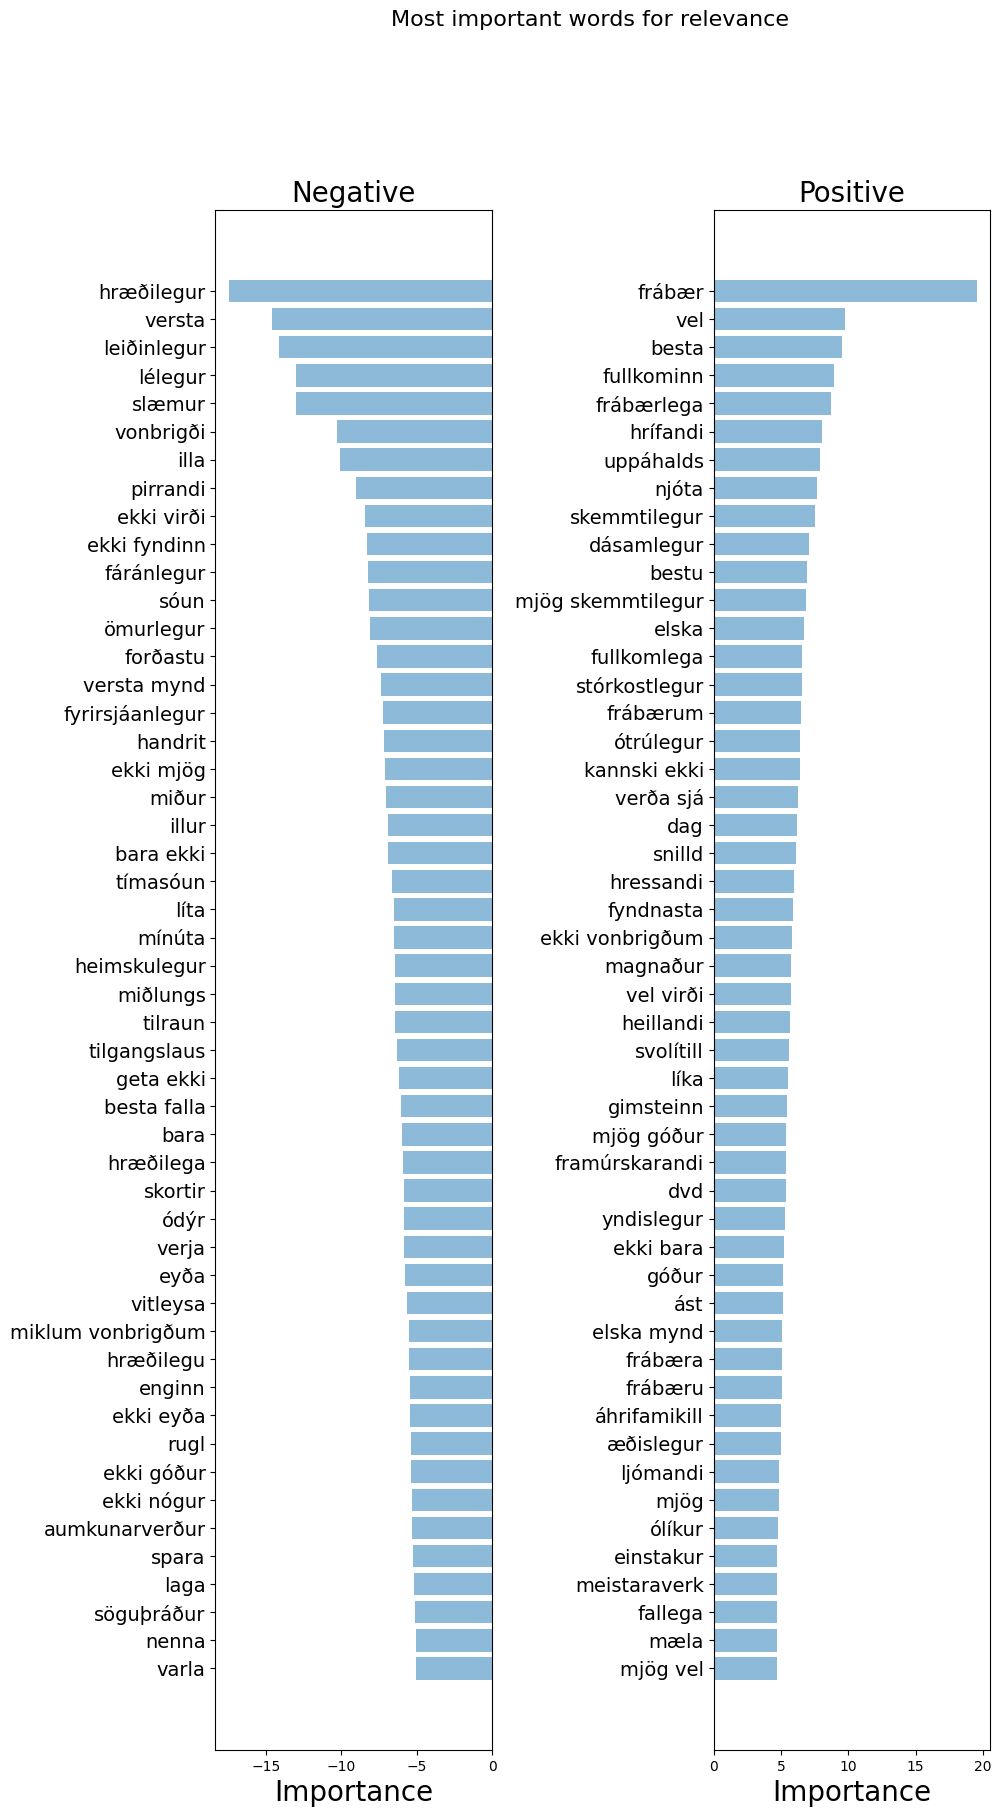

In [88]:
importance_tfidf = get_most_important_features(
    random_search.best_estimator_.get_params().get("vect"),
    random_search.best_estimator_.get_params().get("clf"),
    50,
)
top_scores = [a[0] for a in importance_tfidf[0]["tops"]]
top_words = [a[1] for a in importance_tfidf[0]["tops"]]
bottom_scores = [a[0] for a in importance_tfidf[0]["bottom"]]
bottom_words = [a[1] for a in importance_tfidf[0]["bottom"]]

plot_important_words(
    top_scores,
    top_words,
    bottom_scores,
    bottom_words,
    "Most important words for relevance",
)

In [79]:
print("Best parameters combination found:")
best_parameters = random_search.best_estimator_.get_params()
for param_name in sorted(parameter_grid.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")

Best parameters combination found:
clf__C: 0.78
clf__max_iter: 233
clf__solver: lbfgs
clf__warm_start: True
vect__max_df: 0.2
vect__min_df: 3
vect__ngram_range: (1, 2)
vect__norm: l2


In [81]:
test_accuracy = random_search.score(X_test, y_test)
print(
    "Accuracy of the best parameters using the inner CV of "
    f"the random search: {random_search.best_score_:.3f}"
)
print(f"Accuracy on test set: {test_accuracy:.3f}")

Accuracy of the best parameters using the inner CV of the random search: 0.892
Accuracy on test set: 0.894


In [59]:
imdb = pd.read_csv("../IMDB-Dataset.csv")
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [60]:
reviews = imdb["review"].values
sentiments = imdb["sentiment"].values
sentiments = np.where(sentiments == "positive", 1, 0)
file_path = "../all_stop_words.txt"

# reviews
# freqs = build_freqs(reviews, sentiments)

# X = np.zeros((len(reviews), 3))

# for i in range(len(reviews)):
#     X[i, :] = extract_features(reviews[i], freqs)

X_train, X_test, y_train, y_test = train_test_split(
    reviews, sentiments, test_size=0.2, random_state=42
)

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

model = LogisticRegression(
    C=30,
    class_weight="balanced",
    solver="newton-cg",
    multi_class="multinomial",
    n_jobs=-1,
    random_state=40,
)
model.fit(X_train_counts, y_train)
y_pred = model.predict(X_test_counts)

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))

Accuracy: 0.8742
